In [1]:
#RANDOM ASSORTED NOTES



#While the cross validations themselves aren't terribly useful for much, they do help show that it's not LUCK
#producing any given set of results, aka we didn't land some magic combination of train/test data that just 
#happens to produce really good test results.
#The reason I say this is because, on their own, they are only doing the dead on accuracies rather than the slightly
#expanded ranges that we use for the 'correct enough'-ness of what we're doing otherwise.
#-ryan





In [2]:
import pandas as pd
import numpy as np

In [3]:
mainData = pd.read_csv("vgscore.csv")
mainData = mainData.drop(labels = ['url', 'tot_ship', 'tot_sale', 'na_sale', 'pal_sale', 'jp_sale', 'other_sale', 'last_update'], axis = 1)
mainData.rename(columns = {'title' : 'Name'}, inplace = True)
mainData

,Name,user_Score,release_Date,console,publisher,developer,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,Nintendo,Nintendo EAD,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,PUBG Corporation,PUBG Corporation,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,Nintendo,Nintendo EAD,8.8
...,...,...,...,...,...,...,...
55859,ZOMBIE GOLD RUSH,N/A,26th Oct 17,NS,Amazing Inc.,Amazing Inc.,N/A
55860,Zombillie,N/A,29th Mar 18,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,N/A
55861,Zone of the Enders: The 2nd Runner MARS,N/A,06th Sep 18,PC,Konami,Cygames,N/A
55862,Zoo Tycoon: Ultimate Animal Collection,N/A,31st Oct 17,XOne,Microsoft Studios,Frontier Developments,N/A


In [4]:
#sorry this is slow but the data has every name entry having spaces...
for c in range(len(mainData)):
    mainData["Name"][c] = mainData["Name"][c].strip()
mainData

,Name,user_Score,release_Date,console,publisher,developer,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,Nintendo,Nintendo EAD,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,PUBG Corporation,PUBG Corporation,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,Nintendo,Nintendo EAD,8.8
...,...,...,...,...,...,...,...
55859,ZOMBIE GOLD RUSH,N/A,26th Oct 17,NS,Amazing Inc.,Amazing Inc.,N/A
55860,Zombillie,N/A,29th Mar 18,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,N/A
55861,Zone of the Enders: The 2nd Runner MARS,N/A,06th Sep 18,PC,Konami,Cygames,N/A
55862,Zoo Tycoon: Ultimate Animal Collection,N/A,31st Oct 17,XOne,Microsoft Studios,Frontier Developments,N/A


In [5]:
saleData = pd.read_csv("vgsales.csv")
saleData = saleData.drop(labels = ['Rank', 'Year', 'Publisher'], axis = 1)#Platform
saleData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01


In [6]:
finalData = saleData.merge(mainData, left_on=['Name', 'Platform'], right_on=['Name', 'console'])#, sort = True
finalData.drop(labels = ['console'], axis = 1, inplace = True)
finalData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user_Score,release_Date,publisher,developer,VGscore
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74,N/A,19th Nov 06,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,8.2,18th Oct 85,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82,9.1,27th Apr 08,Nintendo,Nintendo EAD,8.7
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00,8.8,26th Jul 09,Nintendo,Nintendo EAD,8.8
4,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26,N/A,01st Jun 89,Nintendo,Bullet Proof Software,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01,N/A,02nd Dec 03,Kemco,Tantalus Interactive,N/A
15891,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01,N/A,07th Feb 03,Infogrames,Melbourne House,N/A
15892,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01,N/A,28th Oct 08,Activision,Left Field Productions,N/A
15893,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01,N/A,28th Oct 10,7G//AMES,Bitfield GmbH,N/A


In [7]:
finalData.sort_values(by = 'Global_Sales', ascending = False, axis = 0,ignore_index = True, inplace = True)
finalData['platformID'] = finalData.groupby('Platform').ngroup()
finalData['genreID'] = finalData.groupby('Genre').ngroup()
finalData['publisherID'] = finalData.groupby('publisher').ngroup()
finalData['developerID'] = finalData.groupby('developer').ngroup()
finalData['user_Score'] = pd.to_numeric(finalData['user_Score'], 'coerce')
finalData['VGscore'] = pd.to_numeric(finalData['VGscore'], 'coerce')
finalData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user_Score,release_Date,publisher,developer,VGscore,platformID,genreID,publisherID,developerID
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74,NaN,19th Nov 06,Nintendo,Nintendo EAD,NaN,24,10,353,1459
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,8.2,18th Oct 85,Nintendo,Nintendo EAD,NaN,10,4,353,1459
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82,9.1,27th Apr 08,Nintendo,Nintendo EAD,8.7,24,6,353,1459
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00,8.8,26th Jul 09,Nintendo,Nintendo EAD,8.8,24,10,353,1459
4,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,01st Jun 89,Nintendo,Bullet Proof Software,NaN,5,5,353,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,Satisfashion,Wii,Misc,0.01,0.00,0.00,0.00,0.01,NaN,08th Jun 10,Destineer,"eGames, Inc.",NaN,24,3,124,2386
15891,Homeworld Remastered Collection,PC,Strategy,0.00,0.01,0.00,0.00,0.01,NaN,25th Feb 15,Gearbox Software,Gearbox Software,NaN,12,11,188,851
15892,Metal Slug Anthology,PS2,Shooter,0.00,0.00,0.01,0.00,0.01,NaN,28th Mar 07,SNK Playmore,Terminal Reality,NaN,15,8,433,2093
15893,K-1 Grand Prix,PS,Fighting,0.01,0.01,0.00,0.00,0.01,NaN,25th Jan 00,Jaleco,Xing Entertainment,NaN,14,2,250,2336


In [8]:
cleansedData = finalData.drop(['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'publisher', 'developer'], axis = 1)
cleansedData['score'] = cleansedData[['VGscore', 'user_Score']].mean(axis = 1)
cleansedData = cleansedData.drop(['user_Score','VGscore'], axis = 1)
cleansedData['release_Date'] = pd.to_datetime(cleansedData['release_Date'], 'coerce', True, infer_datetime_format = True)
cleansedData.dropna(inplace = True, subset = ['release_Date'])

cleansedData

,Name,Global_Sales,release_Date,platformID,genreID,publisherID,developerID,score
0,Wii Sports,82.74,2006-11-19,24,10,353,1459,NaN
1,Super Mario Bros.,40.24,1985-10-18,10,4,353,1459,8.2
2,Mario Kart Wii,35.82,2008-04-27,24,6,353,1459,8.9
3,Wii Sports Resort,33.00,2009-07-26,24,10,353,1459,8.8
4,Tetris,30.26,1989-06-01,5,5,353,357,NaN
...,...,...,...,...,...,...,...,...
15890,Satisfashion,0.01,2010-06-08,24,3,124,2386,NaN
15891,Homeworld Remastered Collection,0.01,2015-02-25,12,11,188,851,NaN
15892,Metal Slug Anthology,0.01,2007-03-28,15,8,433,2093,NaN
15893,K-1 Grand Prix,0.01,2000-01-25,14,2,250,2336,NaN


In [9]:
testdata = cleansedData.copy()
testdata

,Name,Global_Sales,release_Date,platformID,genreID,publisherID,developerID,score
0,Wii Sports,82.74,2006-11-19,24,10,353,1459,NaN
1,Super Mario Bros.,40.24,1985-10-18,10,4,353,1459,8.2
2,Mario Kart Wii,35.82,2008-04-27,24,6,353,1459,8.9
3,Wii Sports Resort,33.00,2009-07-26,24,10,353,1459,8.8
4,Tetris,30.26,1989-06-01,5,5,353,357,NaN
...,...,...,...,...,...,...,...,...
15890,Satisfashion,0.01,2010-06-08,24,3,124,2386,NaN
15891,Homeworld Remastered Collection,0.01,2015-02-25,12,11,188,851,NaN
15892,Metal Slug Anthology,0.01,2007-03-28,15,8,433,2093,NaN
15893,K-1 Grand Prix,0.01,2000-01-25,14,2,250,2336,NaN


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:

#from datetime import datetime as dt
#d = dt.strptime('2010-03-01', '%Y-%m-%d').date()
#d
#datetime.date(2010, 3, 1)
#d.toordinal()
#finalizingData['release_Date'].toordinal()

In [12]:
finalizingData = testdata.drop(labels = ["Name",'release_Date', "score"], axis = 1)

sections = 20
for i in range(sections):
    finalizingData.iloc[int(len(testdata)*(i*(1/sections))):int(1+len(testdata)*((i+1)*(1/sections))), 0] = int((sections - 1)-i)

    
xfull = finalizingData.drop(labels = "Global_Sales", axis = 1)
yfull = finalizingData["Global_Sales"].astype("int32")
xtrain, xtest, ytrain, ytest = train_test_split(xfull, yfull, test_size = .25)


y_test = ytest.to_numpy()
(unique, counts) = np.unique(y_test, return_counts = True)
print(unique)
print(counts)
finalizingData

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[204 205 207 204 242 186 193 183 191 188 209 191 180 190 208 189 195 208
 187 197]


,Global_Sales,platformID,genreID,publisherID,developerID
0,19.0,24,10,353,1459
1,19.0,10,4,353,1459
2,19.0,24,6,353,1459
3,19.0,24,10,353,1459
4,19.0,5,5,353,357
...,...,...,...,...,...
15890,0.0,24,3,124,2386
15891,0.0,12,11,188,851
15892,0.0,15,8,433,2093
15893,0.0,14,2,250,2336


In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

Correct Prediction:  10.083396512509477 %
One away Predictions:  16.325499115491535 %
Two away Predictions:  12.383118524134446 %
Three away Predictions:  11.549153399039676 %

1 or less Away Prediction:  26.408895628001012 %
2 or less Away Prediction:  38.79201415213546 %
Range of correct:  5.0 %
Range of one away:  15.0 %
Range of two away:  25.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


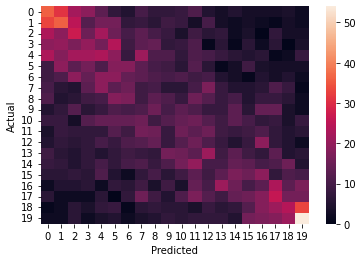

In [14]:
prediction = dtree.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(prediction)):
    if(prediction[i] == y_test[i]):
        accuracy += 1
        continue
        
    if(prediction[i] - 1 == y_test[i] or prediction[i] + 1 == y_test[i]):
        oneOff += 1;
        continue
        
    if(prediction[i] - 2 == y_test[i] or prediction[i] + 2 == y_test[i]):
        twoOff += 1;
        continue
        
    if(prediction[i] - 3 == y_test[i] or prediction[i] + 3 == y_test[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(prediction)*100,"%")
print("One away Predictions: ",oneOff/len(prediction)*100,"%")
print("Two away Predictions: ",twoOff/len(prediction)*100,"%")
print("Three away Predictions: ",threeOff/len(prediction)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(prediction)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(prediction)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': prediction, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [15]:
for i in range(2,30):
    print(i, " crossval Score:", sum(cross_val_score(dtree, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(dtree, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.09028304270912307
3  crossval Score: 0.09679049785190802
4  crossval Score: 0.09811726055092242
5  crossval Score: 0.10039078319306934
6  crossval Score: 0.10045489006823351
7  crossval Score: 0.10171780564801657
8  crossval Score: 0.1012112264725012
9  crossval Score: 0.10329598419713228
10  crossval Score: 0.1015906602467909
11  crossval Score: 0.10178049461337092
12  crossval Score: 0.10253980288097043
13  crossval Score: 0.10367302962151798
14  crossval Score: 0.10449497608484486
15  crossval Score: 0.10102045334865238
16  crossval Score: 0.10424230934215768
17  crossval Score: 0.10569872855399218
18  crossval Score: 0.1062647952793004
19  crossval Score: 0.10266635999344835
20  crossval Score: 0.10342002515675083
21  crossval Score: 0.10278829106964839
22  crossval Score: 0.10259593501074725
23  crossval Score: 0.10399077809459939
24  crossval Score: 0.10335448567618521
25  crossval Score: 0.1053170272250213
26  crossval Score: 0.10361042277444275
27  crossval

In [16]:
randomforest = RandomForestClassifier()
randomforest.fit(xtrain, ytrain)

RandomForestClassifier()

Correct Prediction:  11.06899166034875 %
One away Predictions:  17.210007581501138 %
Two away Predictions:  13.318170331058882 %
Three away Predictions:  11.978771796815769 %

1 or less Away Prediction:  28.278999241849885 %
2 or less Away Prediction:  41.59716957290877 %
Range of correct:  5.0 %
Range of one away:  15.0 %
Range of two away:  25.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


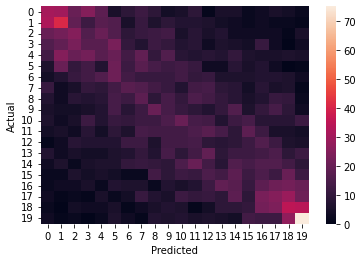

In [17]:
ranPredict = randomforest.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == y_test[i]):
        accuracy += 1
        continue
        
    if(ranPredict[i] - 1 == y_test[i] or ranPredict[i] + 1 == y_test[i]):
        oneOff += 1;
        continue
        
    if(ranPredict[i] - 2 == y_test[i] or ranPredict[i] + 2 == y_test[i]):
        twoOff += 1;
        continue
        
    if(ranPredict[i] - 3 == y_test[i] or ranPredict[i] + 3 == y_test[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(ranPredict)*100,"%")
print("One away Predictions: ",oneOff/len(ranPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(ranPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(ranPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(ranPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(ranPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': ranPredict, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print(df_conf.mode())
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [18]:
#This one is painfully slow
for i in range(2,3):
    temp = i*3
    print(temp, " crossval Score:", sum(cross_val_score(randomforest, xfull, yfull, cv=temp, n_jobs = -1))/temp)
print("Sectional crossval score:", sum(cross_val_score(randomforest, xfull, yfull, cv=sections, n_jobs = -1))/sections)

6  crossval Score: 0.11005812484205207
Sectional crossval score: 0.11264270390376585


In [19]:
knn = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1, p=1)

Correct Prediction:  10.184483194339146 %
One away Predictions:  16.52767247915087 %
Two away Predictions:  12.78746525145312 %
Three away Predictions:  11.928228455900936 %

1 or less Away Prediction:  26.712155673490017 %
2 or less Away Prediction:  39.49962092494314 %
Range of correct:  5.0 %
Range of one away:  15.0 %
Range of two away:  25.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


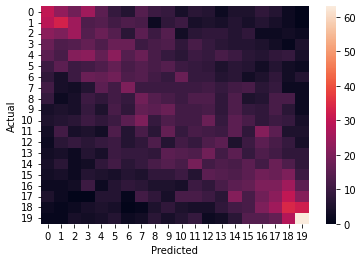

In [20]:
knnPredict = knn.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(knnPredict)):
    if(knnPredict[i] == y_test[i]):
        accuracy += 1
        continue
        
    if(knnPredict[i] - 1 == y_test[i] or knnPredict[i] + 1 == y_test[i]):
        oneOff += 1;
        continue
        
    if(knnPredict[i] - 2 == y_test[i] or knnPredict[i] + 2 == y_test[i]):
        twoOff += 1;
        continue
        
    if(knnPredict[i] - 3 == y_test[i] or knnPredict[i] + 3 == y_test[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(knnPredict)*100,"%")
print("One away Predictions: ",oneOff/len(knnPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(knnPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(knnPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(knnPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(knnPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': knnPredict, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print(df_conf.mode())
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [21]:
for i in range(2,35):
    print(i, " crossval Score:", sum(cross_val_score(knn, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(knn, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.09792772302249178
3  crossval Score: 0.10064442759666414
4  crossval Score: 0.10216072782410918
5  crossval Score: 0.10064370748044738
6  crossval Score: 0.10866818296689411
7  crossval Score: 0.10651961468658384
8  crossval Score: 0.10392686146908565
9  crossval Score: 0.10487559546228081
10  crossval Score: 0.10727774481233524
11  crossval Score: 0.10500273656624505
12  crossval Score: 0.10727824109173617
13  crossval Score: 0.10809638703272
14  crossval Score: 0.10455891377465988
15  crossval Score: 0.1083506271243238
16  crossval Score: 0.1101176068061811
17  crossval Score: 0.10740372498671932
18  crossval Score: 0.10834812861263374
19  crossval Score: 0.10670955243134737
20  crossval Score: 0.10790649861446325
21  crossval Score: 0.10796928491666777
22  crossval Score: 0.10664143170228009
23  crossval Score: 0.10696012450452802
24  crossval Score: 0.10815658481629652
25  crossval Score: 0.10721206412805677
26  crossval Score: 0.10948437905107597
27  crossval 

In [22]:
# End of just throwing the data at stuffs

In [23]:
#KNN Tuning Test, technically its results were used back on the previous KNN to know that k&p = 1 is better

accuraciesOne = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 1)
    
    knn.fit(xtrain, ytrain)
    knnPredict = knn.predict(xtest)
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_test[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_test[i] or knnPredict[i] + 1 == y_test[i]):
            oneOff += 1;
            continue
    accuraciesOne.append((accuracy + oneOff)/len(knnPredict))


accuraciesTwo = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 2)
    
    knn.fit(xtrain, ytrain)
    knnPredict = knn.predict(xtest)
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_test[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_test[i] or knnPredict[i] + 1 == y_test[i]):
            oneOff += 1;
            continue
    accuraciesTwo.append((accuracy + oneOff)/len(knnPredict))

26.712155673490017 %


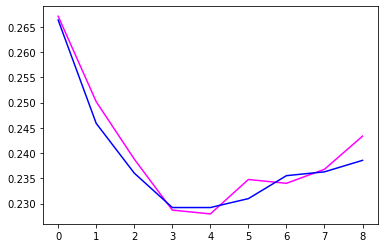

In [24]:
print(accuraciesOne[0]*100, '%')
plt.plot(accuraciesOne, color = 'magenta')
plt.plot(accuraciesTwo, color = 'blue')

In [25]:
#DATE TESTING NOW, THIS IS IMPORTANT SINCE THE TESTING DATA CHANGES NOW

In [26]:
#Adding release month to see if it helps at all
datetest = finalizingData.copy()
datetest['month'] = [i.month for i in testdata['release_Date']]
datetest['year'] = [i.year for i in testdata['release_Date']]

#Day makes KNN spas out
datetest['day'] = [i.day for i in testdata['release_Date']]
datetest

,Global_Sales,platformID,genreID,publisherID,developerID,month,year,day
0,19.0,24,10,353,1459,11,2006,19
1,19.0,10,4,353,1459,10,1985,18
2,19.0,24,6,353,1459,4,2008,27
3,19.0,24,10,353,1459,7,2009,26
4,19.0,5,5,353,357,6,1989,1
...,...,...,...,...,...,...,...,...
15890,0.0,24,3,124,2386,6,2010,8
15891,0.0,12,11,188,851,2,2015,25
15892,0.0,15,8,433,2093,3,2007,28
15893,0.0,14,2,250,2336,1,2000,25


In [27]:
#Setting up train test data
xDatefull = datetest.drop(labels = "Global_Sales", axis = 1)
yDatefull = datetest["Global_Sales"].astype("int32")
xDatetrain, xDatetest, yDatetrain, yDatetest = train_test_split(xDatefull, yDatefull, test_size = .25)


y_Datetest = yDatetest.to_numpy()
(unique, counts) = np.unique(y_Datetest, return_counts = True)
print(unique)
print(counts)
xDatetrain

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[208 201 196 181 203 192 191 210 188 194 198 186 181 204 185 220 201 214
 193 211]


,platformID,genreID,publisherID,developerID,month,year,day
9117,27,3,524,2185,10,2004,26
5909,17,2,339,1941,5,2016,31
3333,24,10,287,448,10,2009,6
12889,18,6,338,2151,4,2006,18
1294,14,10,450,1780,10,1996,31
...,...,...,...,...,...,...,...
13552,4,6,458,168,7,2010,3
14550,12,11,531,684,9,2004,28
10684,18,8,464,809,6,2008,17
14398,19,0,113,2221,2,2015,19


29.946929492039427 %


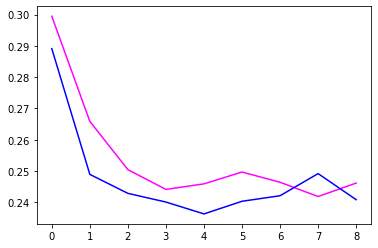

In [28]:
#KNN Tuning Test with Dates
#Note - this time both are on manhattan distance since it just kept winning and now I wished to test
#including the day or not.
#Magenta = no day, blue = day

accuraciesOne = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 1)
    
    knn.fit(xDatetrain.drop(['day'], axis = 1), yDatetrain)
    knnPredict = knn.predict(xDatetest.drop(['day'], axis = 1))
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_Datetest[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_Datetest[i] or knnPredict[i] + 1 == y_Datetest[i]):
            oneOff += 1;
            continue
    accuraciesOne.append((accuracy + oneOff)/len(knnPredict))


accuraciesTwo = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 1)
    
    knn.fit(xDatetrain, yDatetrain)
    knnPredict = knn.predict(xDatetest)
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_Datetest[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_Datetest[i] or knnPredict[i] + 1 == y_Datetest[i]):
            oneOff += 1;
            continue
    accuraciesTwo.append((accuracy + oneOff)/len(knnPredict))
    

print(accuraciesOne[0]*100, "%")
plt.plot(accuraciesOne, color = 'magenta')
plt.plot(accuraciesTwo, color = 'blue')
#Note about the result, including month/year (and/or day) brings KNN up to par with random forest on this data,
#however, N = 1 is still the best.

Correct Prediction:  11.70078342178418 %
One away Predictions:  18.246146070255243 %
Two away Predictions:  12.863280262825372 %
Three away Predictions:  10.866818296689411 %

1 or less Away Prediction:  29.946929492039427 %
2 or less Away Prediction:  42.8102097548648 %
Range of correct:  5.0 %
Range of one away:  15.0 %
Range of two away:  25.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


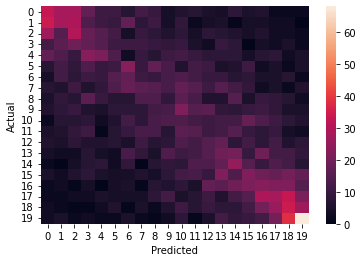

In [29]:
#For KNN heatmap, knowing that dropping day for KNN is helpful
knn = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn.fit(xDatetrain.drop(['day'], axis = 1), yDatetrain)
knnPredict = knn.predict(xDatetest.drop(['day'], axis = 1))

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(knnPredict)):
    if(knnPredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(knnPredict[i] - 1 == y_Datetest[i] or knnPredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(knnPredict[i] - 2 == y_Datetest[i] or knnPredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
        
    if(knnPredict[i] - 3 == y_Datetest[i] or knnPredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(knnPredict)*100,"%")
print("One away Predictions: ",oneOff/len(knnPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(knnPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(knnPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(knnPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(knnPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': knnPredict, 'y_Actual':    yDatetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [30]:
for i in range(2,20):
    print(i, " crossval Score:", sum(cross_val_score(knn, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(knn, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.09792772302249178
3  crossval Score: 0.10064442759666414
4  crossval Score: 0.10216072782410918
5  crossval Score: 0.10064370748044738
6  crossval Score: 0.10866818296689411
7  crossval Score: 0.10651961468658384
8  crossval Score: 0.10392686146908565
9  crossval Score: 0.10487559546228081
10  crossval Score: 0.10727774481233524
11  crossval Score: 0.10500273656624505
12  crossval Score: 0.10727824109173617
13  crossval Score: 0.10809638703272
14  crossval Score: 0.10455891377465988
15  crossval Score: 0.1083506271243238
16  crossval Score: 0.1101176068061811
17  crossval Score: 0.10740372498671932
18  crossval Score: 0.10834812861263374
19  crossval Score: 0.10670955243134737
Sectional crossval score: 0.10790649861446325


In [31]:
#Random forest testing

Correct Prediction:  12.661106899166036 %
One away Predictions:  18.347232752084913 %
Two away Predictions:  12.838008592367956 %
Three away Predictions:  10.96790497851908 %

1 or less Away Prediction:  31.00833965125095 %
2 or less Away Prediction:  43.846348243618905 %
Range of correct:  5.0 %
Range of one away:  15.0 %
Range of two away:  25.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


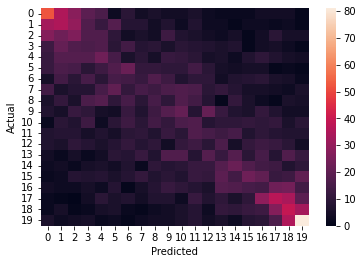

In [32]:
randomforest = RandomForestClassifier()
randomforest.fit(xDatetrain, yDatetrain)
ranPredict = randomforest.predict(xDatetest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(ranPredict[i] - 1 == y_Datetest[i] or ranPredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(ranPredict[i] - 2 == y_Datetest[i] or ranPredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
        
    if(ranPredict[i] - 3 == y_Datetest[i] or ranPredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(ranPredict)*100,"%")
print("One away Predictions: ",oneOff/len(ranPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(ranPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(ranPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(ranPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(ranPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': ranPredict, 'y_Actual':    yDatetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [33]:
#random forest tuning attempt
#Testing estimators level with max features
combinedAcc = []
accuracy = []
oneOff = []
twoOff = []
threeOff = []
estimators = 50
run = 0
while(True):
    print(run)
    accuracy.append([])
    oneOff.append([])
    twoOff.append([])
    threeOff.append([])
    for features in range(1, 8):
        randomforest = RandomForestClassifier(n_estimators = estimators, n_jobs = -1, max_features = features)
        randomforest.fit(xDatetrain, yDatetrain)
        ranPredict = randomforest.predict(xDatetest)
        accuracy[run].append(0)
        oneOff[run].append(0)
        twoOff[run].append(0)
        threeOff[run].append(0)


        for i in range(len(ranPredict)):
            if(ranPredict[i] == y_Datetest[i]):
                accuracy[run][features - 1] += 1
                continue

            if(ranPredict[i] - 1 == y_Datetest[i] or ranPredict[i] + 1 == y_Datetest[i]):
                oneOff[run][features - 1] += 1;
                continue

            if(ranPredict[i] - 2 == y_Datetest[i] or ranPredict[i] + 2 == y_Datetest[i]):
                twoOff[run][features - 1] += 1;
                continue

            if(ranPredict[i] - 3 == y_Datetest[i] or ranPredict[i] + 3 == y_Datetest[i]):
                threeOff[run][features - 1] += 1;
                continue

        accuracy[run][features - 1] = accuracy[run][features - 1]/len(ranPredict)
        oneOff[run][features - 1] = oneOff[run][features - 1]/len(ranPredict)
        twoOff[run][features - 1] = twoOff[run][features - 1]/len(ranPredict)
        threeOff[run][features - 1] = threeOff[run][features - 1]/len(ranPredict)
        combinedAcc.append(accuracy[run][features - 1] + oneOff[run][features - 1] + twoOff[run][features - 1])
    
    estimators += 50
    run += 1
    
    if(run > 14):
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [34]:
#Notes about this data, 
#The 0-14 is the steps of n_estimators ranging from 50 to 750
#The 0-6 are the max_features, ranging from 1-7

In [35]:
accDF = pd.DataFrame(accuracy)
oneOffDF = pd.DataFrame(oneOff)
twoOffDF = pd.DataFrame(twoOff)
threeOffDF = pd.DataFrame(threeOff)
print(oneOffDF)

           0         1         2         3         4         5         6
0   0.182209  0.182209  0.187516  0.177913  0.180692  0.170584  0.180692
1   0.180692  0.182209  0.179176  0.185747  0.178165  0.177660  0.178165
2   0.181198  0.179176  0.183472  0.182209  0.180945  0.182967  0.174375
3   0.182461  0.181198  0.179682  0.187516  0.184736  0.183725  0.181198
4   0.182967  0.183472  0.179176  0.181198  0.179682  0.174880  0.175638
5   0.182461  0.182461  0.176902  0.183472  0.178923  0.179176  0.175133
6   0.177660  0.185494  0.180187  0.182209  0.181703  0.183978  0.178165
7   0.182461  0.181198  0.183220  0.180945  0.180440  0.180945  0.174880
8   0.179176  0.182209  0.180440  0.180945  0.179176  0.178418  0.173616
9   0.181451  0.180945  0.180187  0.179176  0.180440  0.177154  0.176396
10  0.179176  0.180692  0.181703  0.179176  0.181703  0.180187  0.178418
11  0.177154  0.183220  0.185241  0.177913  0.177660  0.178165  0.182967
12  0.174375  0.183220  0.181451  0.178923  0.17892

AxesSubplot(0.125,0.125;0.62x0.755)


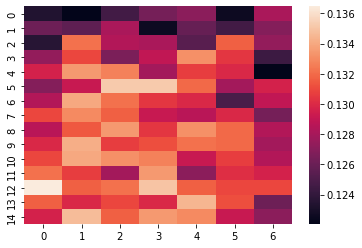

In [36]:
print(sn.heatmap(accDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


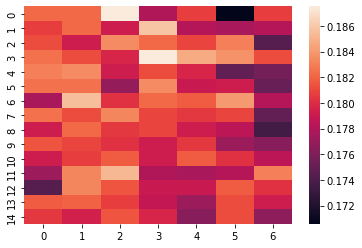

In [37]:
print(sn.heatmap(oneOffDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


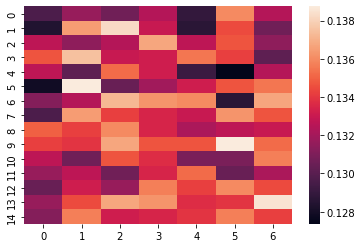

In [38]:
print(sn.heatmap(twoOffDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


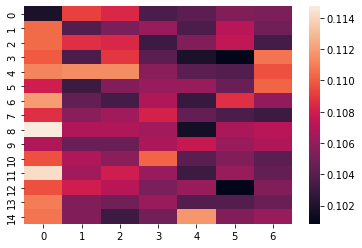

In [39]:
print(sn.heatmap(threeOffDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


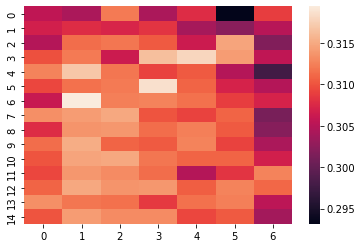

In [40]:
print(sn.heatmap(accDF.add(oneOffDF), annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


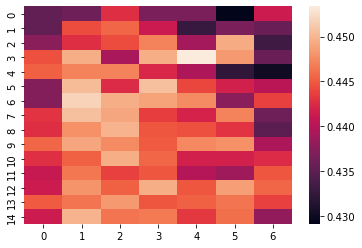

In [41]:
print(sn.heatmap(accDF.add(oneOffDF).add(twoOffDF), annot=False))

In [42]:
#General trends noticed 
#- If more features are able to be considered at once, there should be more estimators
#- Purely accurate seems to not like too many features (Above 3) and 200+ estimators is fine
#- One Off and Two Off both have a diagonal where for every feature added there should be ~50 more estimators
#- Two Off degrades as more features and estimators are added
#- Three Off does not particularly care.
#Conclusion, estimators should be kept in the 200-600 range and features around 2-4

Correct Prediction:  13.090725296942127 %
One away Predictions:  18.473591104372 %
Two away Predictions:  13.292898660601466 %
Three away Predictions:  10.209754864796563 %

1 or less Away Prediction:  31.564316401314123 %
2 or less Away Prediction:  44.857215061915596 %
Range of correct:  5.0 %
Range of one away:  15.0 %
Range of two away:  25.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


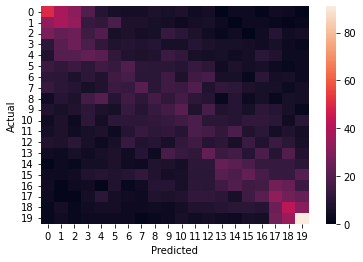

In [43]:
#Mildly tuned up random forest, mostly just more reliable at making the numbers come out
#Max features 3 works more consistantly than 2, but 2 can get ever so slightly higher numbers
randomforest = RandomForestClassifier(n_estimators = 550, n_jobs = -1, max_features = 3)
randomforest.fit(xDatetrain, yDatetrain)
ranPredict = randomforest.predict(xDatetest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(ranPredict[i] - 1 == y_Datetest[i] or ranPredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(ranPredict[i] - 2 == y_Datetest[i] or ranPredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
        
    if(ranPredict[i] - 3 == y_Datetest[i] or ranPredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(ranPredict)*100,"%")
print("One away Predictions: ",oneOff/len(ranPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(ranPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(ranPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(ranPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(ranPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': ranPredict, 'y_Actual':    yDatetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))